# Sales Data analysis

## Superstore data

# OBJECTIVES
- <H6>what is the overall sales trend ?
- <H6> what is the overall profit trend ?
- <H6> what are the top most selling segments ?
- <H6> what are the top most selling products ?
- <H6> Insites about any non profitable product ?
- <H6> what are the most profitable category and sub category ?
    

<h2>import libraries 

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#import files, this is an excel file
df = pd.read_excel('C:\\Users\\pande\\Downloads\\Sales-Analysis-master\\Sales-Analysis-master\\superstore_sales.xlsx')

<h2>Auditing data 

In [3]:
df.head(5) #top columns to see columns head and the type of overall data
df.info() # brief info about data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [4]:
#description
df.shape
df.describe()


,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [5]:
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


<h1> Exploration part

In [70]:
#converting dates into months format
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [73]:
#summing up per month sales for every year
sales_trend = df.groupby('month_year').sum()[['sales', 'profit']].reset_index()

In [96]:
#Overall sales trend and profit trend
sales_trend.head(5)

,month_year,sales,profit
0,2011-01,98898.48886,8321.80096
1,2011-02,91152.15698,12417.90698
2,2011-03,145729.36736,15303.56826
3,2011-04,116915.76418,12902.32438
4,2011-05,146747.83610,12183.82870


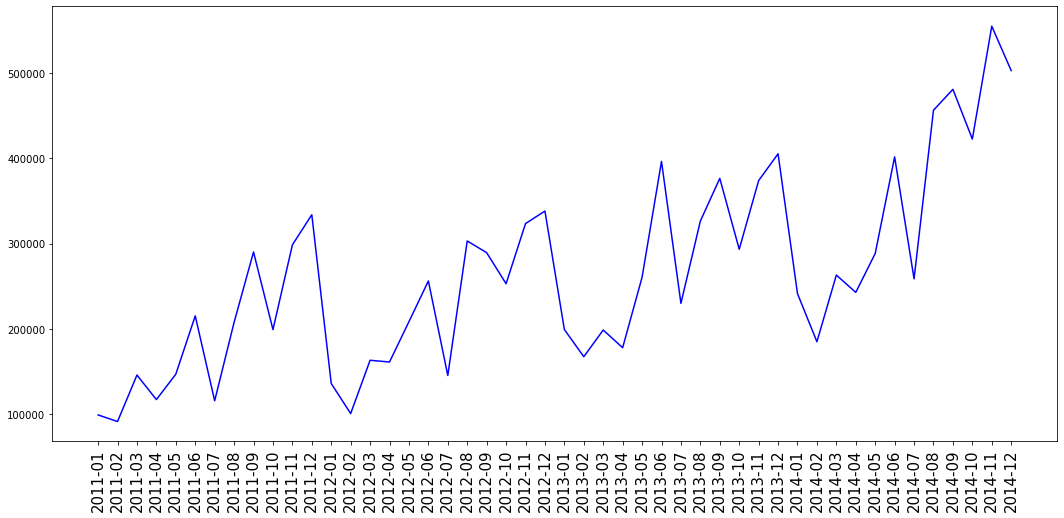

In [85]:
#plotting sales trend over years
plt.figure(figsize=(18,8))
plt.plot(sales_trend['month_year'], sales_trend['sales'], color='b')
plt.xticks(rotation ='vertical', size =15)

plt.show()

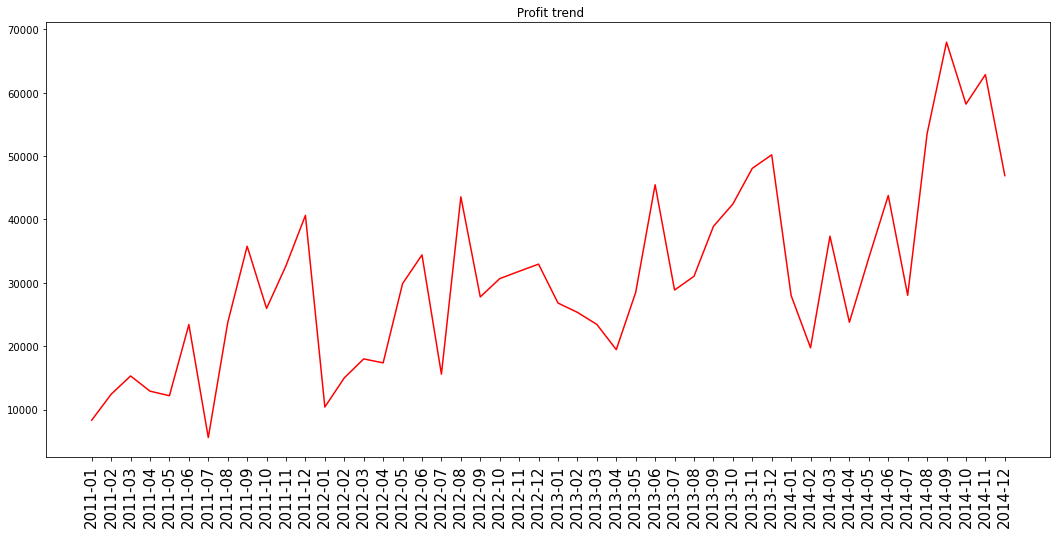

In [93]:
#plotting profit trend
plt.figure(figsize=(18,8))
plt.plot(sales_trend['month_year'], sales_trend['profit'], color='r')
plt.xticks(rotation ='vertical', size =15)
plt.title(' Profit trend')
plt.show()

<h2> Segments analysis

C:\Users\pande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='segment', ylabel='count'>

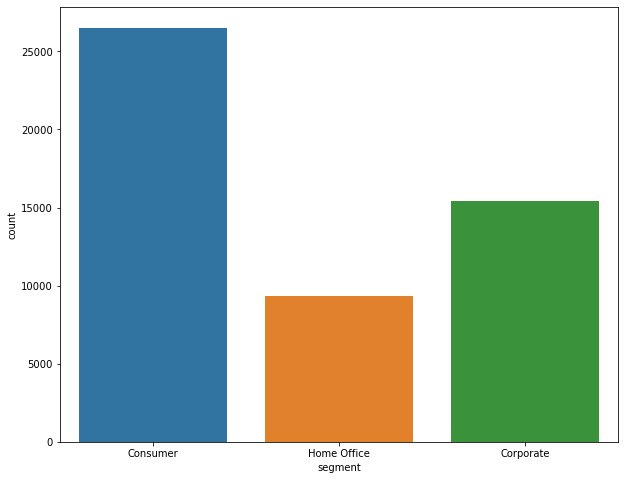

In [207]:
#Over look of all segments
plt.figure(figsize= (10,8))
sns.countplot(df['segment'])

 - <h3> Consumer Section

In [196]:
#Taking out consumer section data
consumer_products_data = df.loc[(df['segment']=='Consumer')]
consumer_products_data
#all products sales under consumer section
all_consumer_products = consumer_products_data.groupby('product_name').sum()['sales']
#top selling products under consumer section
top_consumer_products = all_consumer_products.sort_values(ascending = False)
#top 10 products as per sales
top_consumer_products.head(10)

product_name
Cisco Smart Phone, Full Size                  52471.8550
Nokia Smart Phone, Full Size                  50537.9615
Apple Smart Phone, Full Size                  39138.3010
Samsung Smart Phone, Cordless                 34580.5500
Hon Executive Leather Armchair, Adjustable    33595.1874
Motorola Smart Phone, Full Size               33469.7982
Canon imageCLASS 2200 Advanced Copier         32899.9060
Cisco Smart Phone, Cordless                   27709.6160
Nokia Smart Phone, with Caller ID             27211.1769
Novimex Executive Leather Armchair, Red       26369.4600
Name: sales, dtype: float64

In [198]:
#most less sold products
top_consumer_products.tail(10)

product_name
Sanford Pocket Accent Highlighters                  3.200
Storex Flexible Poly Binders with Double Pockets    3.168
Wilson Jones Suede Grain Vinyl Binders              2.780
Design Ebony Sketching Pencil                       2.780
Avery 479                                           2.610
Maxell 4.7GB DVD+R 5/Pack                           2.376
Acco Hanging Data Binders                           2.286
Wilson Jones DublLock D-Ring Binders                2.025
Maxell 4.7GB DVD-R 5/Pack                           1.584
Hoover Commercial Lightweight Upright Vacuum        1.392
Name: sales, dtype: float64

- <h3> Products

In [110]:
#Top selling products in all segments
product_sales = df.groupby('product_name').sum()['sales']
top_products = product_sales.sort_values(ascending=False)
top_products.head(10)

product_name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: sales, dtype: float64

- <h3> Top 10 Profitable Products

In [111]:
products_profit = df.groupby('product_name').sum()['profit']
top_profitable_products = products_profit.sort_values(ascending = False)
top_profitable_products.head(10)

product_name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: profit, dtype: float64

- <h4> No 1 selling product not generating profit why??

In [132]:
#finding insites in apple's data
apple_data = df.loc[(df['product_name']=='Apple Smart Phone, Full Size')]
apple_sales_profit = apple_data[['month_year','sales', 'profit']]


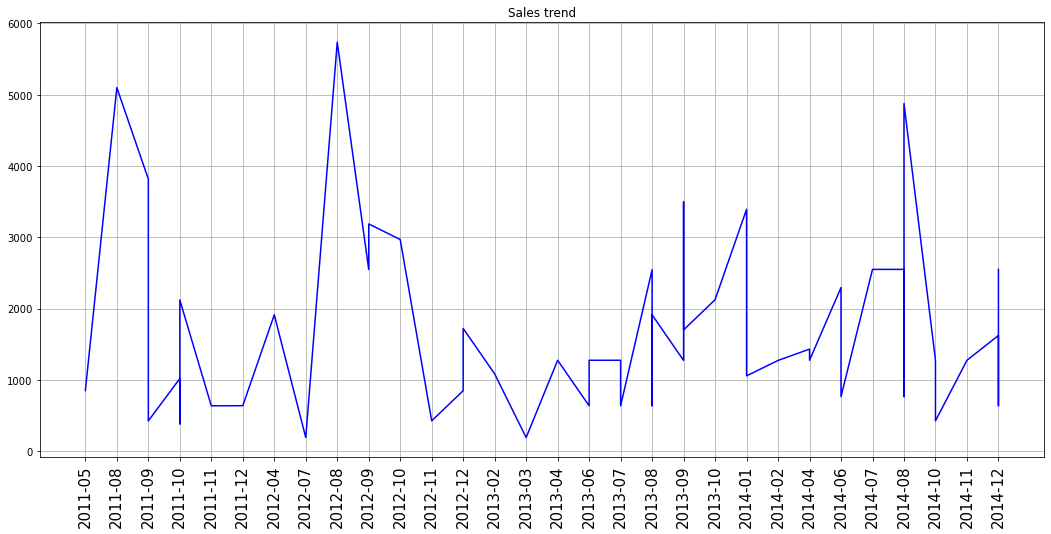

In [143]:
#plotting 'apple's sales trend
plt.figure(figsize=(18,8))
plt.plot(apple_sales_profit['month_year'], apple_sales_profit['sales'], color='b')
plt.xticks(rotation ='vertical', size =15)
plt.title('Sales trend')
plt.grid(True)
plt.show()

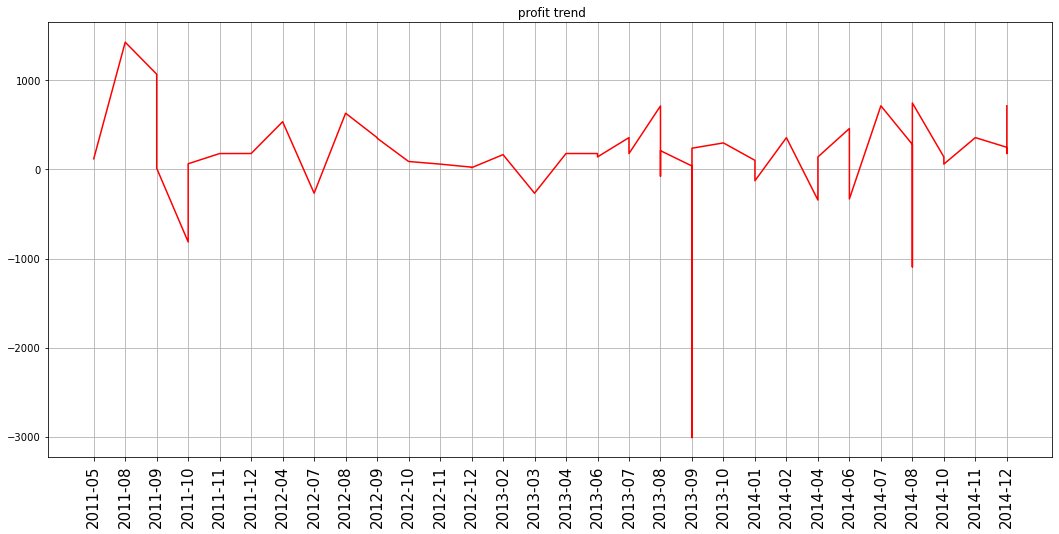

In [144]:
#plotting profit trend
plt.figure(figsize=(18,8))
plt.plot(apple_sales_profit['month_year'], apple_sales_profit['profit'], color='r')
plt.xticks(rotation ='vertical', size =15)
plt.title('profit trend')
plt.grid(True)
plt.show()

In [153]:
# lets see if discount works for apple or not
apple_data = df.loc[(df['product_name']=='Apple Smart Phone, Full Size')]
apple_sales_profit = apple_data[['month_year','sales', 'profit']]


Text(0, 0.5, 'Sales')

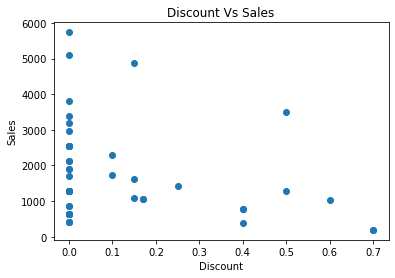

In [160]:
#plotting discount vs sales
x = apple_discount_data
y = apple_sales
plt.scatter(x,y)
plt.title('Discount Vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

In [161]:
#findind out correlation
apple_data.corr()

,sales,quantity,discount,profit,shipping_cost,year
sales,1.000000,0.911007,-0.237461,0.278020,0.660333,-0.040837
quantity,0.911007,1.000000,-0.012963,-0.076951,0.624870,-0.035919
discount,-0.237461,-0.012963,1.000000,-0.617556,-0.200376,0.025603
profit,0.278020,-0.076951,-0.617556,1.000000,0.195089,-0.078673
shipping_cost,0.660333,0.624870,-0.200376,0.195089,1.000000,0.113254
year,-0.040837,-0.035919,0.025603,-0.078673,0.113254,1.000000


In [165]:
#Discount given till date
apple_discount = apple_data['discount'].sum()
apple_discount

5.44

- <h3> Most preferred ship mode?

C:\Users\pande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ship_mode', ylabel='count'>

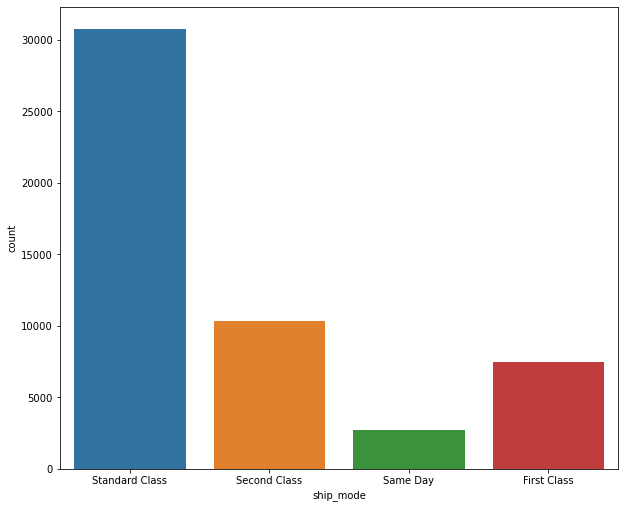

In [205]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['ship_mode'])

- <h4> Which are the most profitable category and sub-category?

In [209]:
cat_sub_profit = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

In [210]:
cat_sub_profit.sort_values(['category', 'profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870